In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import yfinance as yf

#******************************************TASK1***********************************************#
rss_feeds = {
    "MarketWatch": "https://feeds.marketwatch.com/marketwatch/topstories",
    "CNBC":"https://search.cnbc.com/rs/search/combinedcms/view.xml?partnerId=wrss01&id=10000664"
}

dataframe = pd.DataFrame(columns=['Source','Headline','PubDate'])

for source,url in rss_feeds.items():
    html_text = requests.get(url).text
    soup = BeautifulSoup(html_text,features='lxml')
    items = soup.find_all('item')
    for item in items:
        headline = item.title.text
        pubdate = item.pubdate.text
        new_row = pd.DataFrame([{'Source':source,'Headline':headline,'PubDate':pubdate}])
        dataframe = pd.concat([dataframe,new_row],ignore_index=True)

dataframe.to_csv('news_raw.csv',index=False)

#***********************************************TASK2*********************************************#

dataframe["PubDate"] = pd.to_datetime(dataframe["PubDate"], utc=True, errors="coerce")
dataframe["date"] = dataframe["PubDate"].dt.date
dataframe["headline_length"] = dataframe["Headline"].astype(str).str.len()
dataframe.to_csv("news_cleaned.csv", index=False)

#***********************************************TASK4*********************************************#

nvda_data = yf.download("NVDA",period='10d')
nvda_data.columns = nvda_data.columns.get_level_values(0)
nvda_data.to_csv('stock_data.csv',index=False)

#***********************************************TASK6***********************************************#

nvda_data = nvda_data.reset_index()
nvda_data['date'] = nvda_data['Date'].dt.date
merged_df = dataframe.merge(nvda_data, on='date', how='left')
merged_df['is_trading_day'] = merged_df['Open'].notna()
merged_df.to_csv('merged_midterm_data.csv', index=False)



C:\Users\Aryan\AppData\Local\Temp\ipykernel_7764\2475191489.py:16: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the lxml package installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.
  soup = BeautifulSoup(html_text,features='lxml')
[*********************100%***********************]  1 of 1 completed


#TASK 3 

#1.The <title> xml tag was used to extract the headlines from the html code. 

#2.The role of <item> is to give a unique identity to the news articles in the page which makes it easier to parse.

#3.An RSS Feed is used to automate the process of extracting and viewing information,it is generally written in xml format while a normal html page is usually used for general viewing of the public and contains more information than required.

#TASK 5

#1.Non-trading dates

    2025-12-20 
    2025-12-21 
    2025-12-25 – Christmas
    2025-12-27 
    2025-12-28 

#2.Weekends (Dec 20, 21, 27, 28)
        Stock markets are closed on Saturdays and Sundays to allow for settlement, clearing, and rest for market participants.
   Public holiday (Dec 25 – Christmas Day)

#3.Almost no news articles from MarketWatch and CNBC fall on non-trading days, as there is no movement in the stock market.

#TASK 7
1.a)The News Frequency is almost negligible on non-trading days when compared to trading days.This is most likely due to non availability of the stock market which is the main topic for financial news.
b)The news volume per day affects the overall price of the stock.A large volume of news leads a relatively huge increase or decrease in the price of the stocks.We can see from the graph below that the news volume reached its maximum at around the 31st which a drop in prices.
c)It is visible that CNBC provides a large volume of news when compared to MarketWatch.This could mean that MarketWatch provides stronger points while CNBC sticks to having a larger volume.

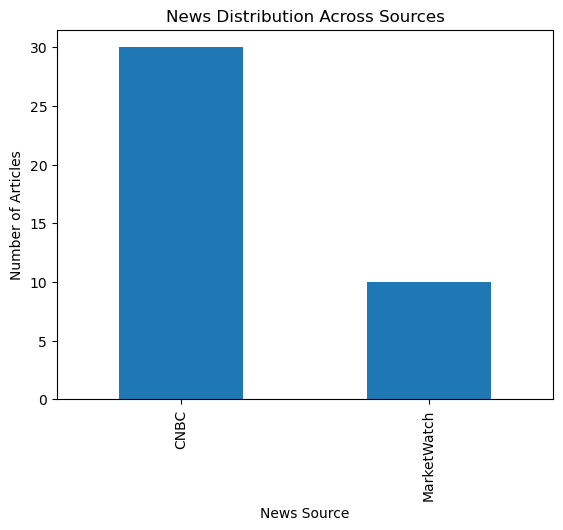

In [4]:
#****************************************TASK7*********************************************************
import matplotlib.pyplot as plt
source_counts = dataframe['Source'].value_counts()
plt.figure()
source_counts.plot(kind='bar')
plt.xlabel('News Source')
plt.ylabel('Number of Articles')
plt.title('News Distribution Across Sources')
plt.show()

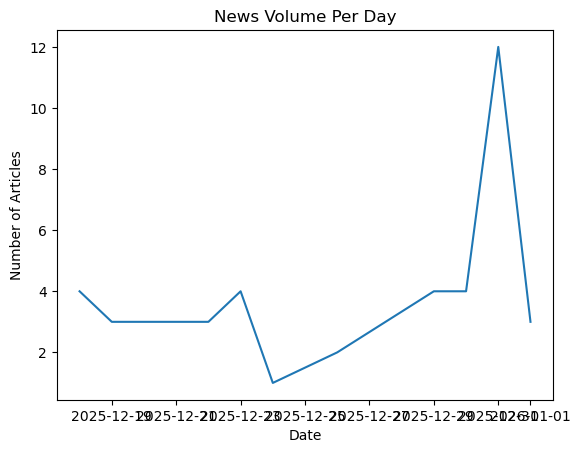

In [5]:
#*****************************************TASK7************************************************************
import matplotlib.pyplot as plt
daily_counts = dataframe.groupby('date').size()
plt.figure()
plt.plot(daily_counts.index, daily_counts.values)
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.title('News Volume Per Day')
plt.show()